In [7]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import pickle

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from joblib import dump, load
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

pd.set_option('display.max_columns',None)
%matplotlib inline


ModuleNotFoundError: No module named 'sklearn'

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
df = pd.read_csv("KDDTest+.txt")
df.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [ ]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [ ]:
df.columns = columns

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [ ]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,22543.000000,2.254300e+04,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.0,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,218.868784,1.039591e+04,2.056110e+03,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,0.002440,0.000266,0.114670,0.008739,0.001153,0.003549,0.0,0.000488,0.028435,79.021692,31.125316,0.102928,0.103640,0.238429,0.235145,0.740376,0.094075,0.098115,193.866699,140.756332,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649,18.017833
std,1407.207069,4.727969e+05,2.121976e+04,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,0.049335,0.021061,8.041792,0.676857,0.048015,0.067831,0.0,0.022085,0.166214,128.538218,89.064396,0.295373,0.298337,0.416096,0.416193,0.412479,0.259143,0.253550,94.036867,111.783059,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851,4.270409
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,123.000000,16.000000,0.000000,0.000000,0.250000,0.070000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [ ]:
df.loc[df['outcome'] == "normal", "outcome"] = 'normal'
df.loc[df['outcome'] != 'normal', "outcome"] = 'attack'

In [ ]:
df.loc[df['outcome'] == "normal", "outcome"] = 0
df.loc[df['outcome'] != 0, "outcome"] = 1

In [ ]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login']
df.drop(cat_cols, axis=1, inplace=True)

In [ ]:
df.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1,21
1,2,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0,21
2,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1,15
3,1,0,15,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1,11
4,0,267,14515,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,0,21


In [ ]:
X = df.drop(['outcome'], axis=1)
y = df['outcome']

In [ ]:
y=y.astype('int')

In [ ]:
std_scaler = StandardScaler()
x = std_scaler.fit_transform(X)

In [ ]:
dump(std_scaler, 'std_scaler.bin', compress=True)

['std_scaler.bin']

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
x = pca.fit_transform(x)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
np.save('scaled-input', x)

In [ ]:
n_components = 10

# Get the indices of the original features with the highest loadings in the first 10 principal components
top_feature_indices = np.argsort(np.abs(pca.components_[:n_components]), axis=1)[:, ::-1]

# Map the indices to the original feature names
original_feature_names = X.columns  # Replace with your actual feature names
selected_feature_names = [original_feature_names[i] for i in top_feature_indices.ravel()]

# Print the names of the top 10 selected features
print("Top 10 selected feature names:")
for feature_name in selected_feature_names[:n_components]:
    print(feature_name)

Top 10 selected feature names:
same_srv_rate
dst_host_same_srv_rate
dst_host_srv_rerror_rate
dst_host_rerror_rate
rerror_rate
srv_rerror_rate
dst_host_srv_count
count
diff_srv_rate
dst_host_diff_srv_rate


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(18034, 10)

In [ ]:
x_test.shape

(4509, 10)

In [ ]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))

    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))

    train_f1 = metrics.f1_score(y_train, model.predict(X_train))
    test_f1 = metrics.f1_score(y_test, model.predict(X_test))


    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    print("Training F1 Score " + str(name) + " {}  Test F1 Score ".format(train_f1*100) + str(name) + " {}".format(test_f1*100))

    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 98.91328454202706
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 98.99458623356536
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 99.10956252419668
Training F1 Score DecisionTreeClassifier 100.0  Test F1 Score DecisionTreeClassifier 99.05204101373573


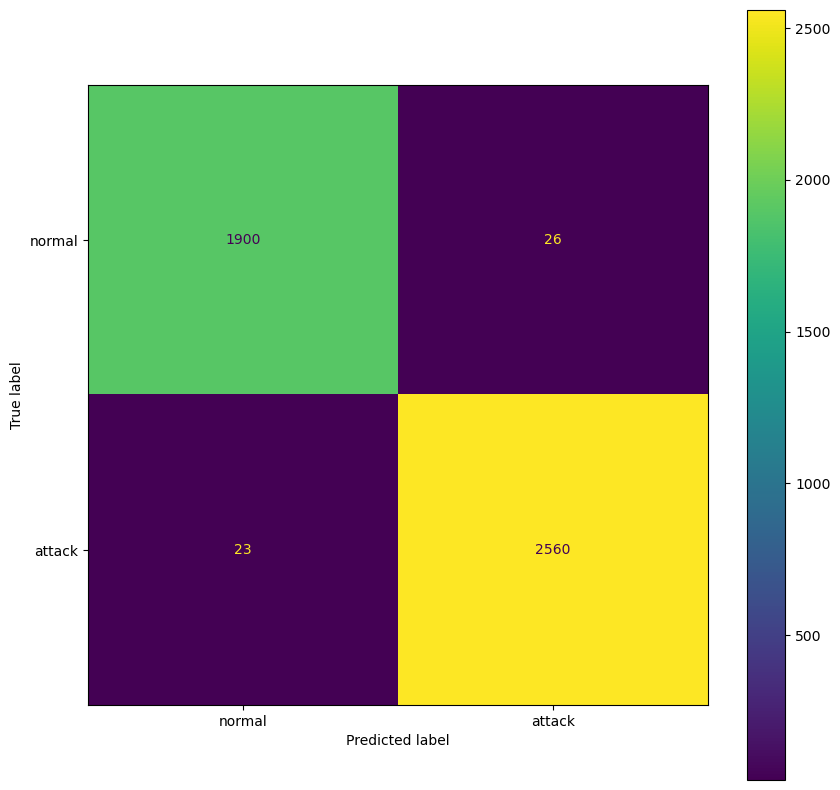

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
evaluate_classification(model, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

In [ ]:
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
selected_features = ['same_srv_rate',
'dst_host_same_srv_rate',
'dst_host_srv_rerror_rate',
'dst_host_rerror_rate',
'rerror_rate',
'srv_rerror_rate',
'dst_host_srv_count',
'count',
'diff_srv_rate',
'dst_host_diff_srv_rate']

In [ ]:
def predict_with_model(features, loaded_model):
    # Ensure the input features are in the correct order and format
    input_features = np.array(features).reshape(1, -1)

    # Initialize a StandardScaler for scaling the features
    scaler = StandardScaler()
    
    z = np.load('scaled-input.npy')
    
    scaler.fit_transform(z)

    # Scale the input features
    scaled_features = scaler.transform(input_features)

    # Make predictions using the loaded decision tree model
    prediction = loaded_model.predict(scaled_features)

    # Check if the prediction indicates a potential network attack
    

    # Return the prediction
    return prediction

In [ ]:
input_features = [1.00,0.61,0.00,0.00,0.0,0.0,86,1,0.00,0.04]  # Replace with your 10 features
model_predictions = predict_with_model(input_features, loaded_model)

print("Model Predictions:", model_predictions)

Model Predictions: [0]


In [ ]:
input_features = [1.00,0.31,0.71,0.83,1.0,0.5,86,1,0.00,0.17]  # Replace with your 10 features
model_predictions = predict_with_model(input_features, loaded_model)

print("Model Predictions:", model_predictions)

Model Predictions: [1]
